In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
train_df = pd.read_csv("training_twitter_x_y_train.csv")
#train_df

In [3]:
"""
non_zero_retweets = train_df[train_df['retweet_count'] > 0]
print(len(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'negative']))
print(len(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'positive']))
print(len(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'neutral']))

print(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'negative'])
print(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'positive'])
print(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'neutral'])

"""

"\nnon_zero_retweets = train_df[train_df['retweet_count'] > 0]\nprint(len(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'negative']))\nprint(len(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'positive']))\nprint(len(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'neutral']))\n\nprint(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'negative'])\nprint(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'positive'])\nprint(non_zero_retweets[non_zero_retweets['airline_sentiment'] == 'neutral'])\n\n"

In [4]:
def num_senti(s):
    if s == "negative" :
        return -1
    elif s == "neutral" :
        return 0
    else:
        return 1
def num_to_sent(s):
    if s == -1 :
        return "negative"
    elif s == 0 :
        return "neutral"
    else:
        return "positive"


In [157]:
tweets = train_df["text"].values

In [216]:
def split_attached_words_remove_punct(tweets) :
    clean_tweets = []
    import re
    import string
    printable = set(string.ascii_letters + string.whitespace)
    for tweet in tweets :
        new_tweet = []
        for word in tweet:
            clean_word = re.sub("[0-9]+", '', word)
            clean_word = re.sub("\s+", " ", clean_word)
            content = [c for c in clean_word if c in printable]
            clean_word = "".join(content)
            new_tweet.append(clean_word)
        clean_tweets.append(" ".join(new_tweet))
    return clean_tweets
        
def remove_stop_words(tweets, stops) :
    from nltk import word_tokenize
    clean_tweets = []
    for tweet in tweets :
        new_tweet = []
        for word in word_tokenize(tweet):
            if word.lower() not in stops :            
                new_tweet.append(word)
        clean_tweets.append(" ".join(new_tweet))
    return clean_tweets
        
import string
from nltk.corpus import stopwords
stops = list(stopwords.words('english'))
stops += (list(string.punctuation))
stops


def remove_hrefs(tweets) :
    clean_tweets = []
    import re
    for tweet in tweets :
        new_tweet = []
        for word in tweet.split():
            #if not (word.startswith("http://") or word.startswith("https://")):
            word = re.sub("[^A-Za-z ]", ' ', word)
            word = re.sub("\s+", " ", word)
            new_tweet.append(word)
            #else:
            #    print("found", word)
        clean_tweets.append(" ".join(new_tweet))
    return clean_tweets
def lower(tweets) :
    clean_tweets = []
    for tweet in tweets :
        clean_tweets.append(tweet.lower())
    return clean_tweets

In [217]:
hrefs_removed = remove_hrefs(tweets)
#print(hrefs_removed)
stop_words_removed = remove_stop_words(hrefs_removed, stops)
#print(stop_words_removed)

In [218]:
final_train_tweets = lower(stop_words_removed)

In [219]:
test_df = pd.read_csv("test_twitter_x_test.csv")
#test_df

In [220]:
test_tweets = test_df["text"].values

In [221]:
hrefs_removed = remove_hrefs(test_tweets)
stop_words_removed = remove_stop_words(hrefs_removed, stops)

In [222]:
final_test_tweets = lower(stop_words_removed)

In [223]:
len(final_train_tweets[0]), len(final_test_tweets[0])

(88, 82)

In [409]:
tfidf = TfidfVectorizer(max_df = 0.22, min_df = 0.0001, ngram_range=(1, 3))
X_train = tfidf.fit_transform(tweets).todense()
X_test = tfidf.transform(test_tweets).todense()
print(X_train.shape)
print(X_test.shape)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(10980, 36614)
(3660, 36614)


In [368]:
tfidf = TfidfVectorizer(max_df = 1.0, min_df = 0.0004, ngram_range=(1, 3))
X_train = tfidf.fit_transform(final_train_tweets).todense()
X_test = tfidf.transform(final_test_tweets).todense()
print(X_train.shape)
print(X_test.shape)


(10980, 4174)
(3660, 4174)


In [321]:
"""
0.78 score
tfidf = TfidfVectorizer(max_df = 1.0, min_df = 0.0006, ngram_range=(1, 3))
(10980, 2891)
(3660, 2891)
"""

'\n0.78 score\ntfidf = TfidfVectorizer(max_df = 1.0, min_df = 0.0006, ngram_range=(1, 3))\n(10980, 2891)\n(3660, 2891)\n'

In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [362]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#pca = PCA()
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

In [228]:
Y_train = [num_senti(sentiment) for sentiment in train_df['airline_sentiment'].values]

In [246]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
print("Neural Network", nn_clf.score(X_train_pca, Y_train))
print("Random Forest", rf_clf.score(X_train_pca, Y_train))
print("Naive Bayes", nb_clf.score(X_train, Y_train))
print("Adaboost Log Regr", ada_clf.score(X_train_pca, Y_train))
print("Bagging SVM", bag_clf.score(X_train_pca, Y_train))

In [ ]:
# 0.73
# 0.67
# 0.753
# 0.71
# 0.72

In [23]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [403]:
best_clf = LogisticRegression(C = 0.0001, solver = 'sag', max_iter=1000, fit_intercept = True)

In [404]:
best_clf.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [405]:
best_clf.score(X_train_scaled, Y_train)

0.79663023679417122

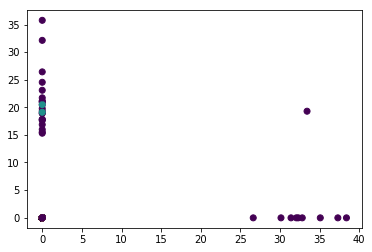

In [406]:
import matplotlib.pyplot as plt
Y_train_pred = best_clf.predict(X_train_scaled)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = Y_train_pred)
plt.show() 

In [407]:
Y_pred = best_clf.predict(X_test_scaled)
Y_pred_txt = [num_to_sent(sent) for sent in Y_pred]
np.savetxt("predictions.csv", Y_pred_txt, fmt = "%s")

In [410]:
nb_clf = MultinomialNB(alpha = 0.01)
nb_clf.fit(X_train, Y_train)
print(nb_clf.score(X_train, Y_train))
Y_pred = nb_clf.predict(X_test)
Y_pred_txt = [num_to_sent(sent) for sent in Y_pred]
np.savetxt("nb_predictions.csv", Y_pred_txt, fmt = "%s")

0.972859744991


In [ ]:
def make_grid (X, Y, h = 0.2) :
    x = np.arange(X.min() -1, X.max() + 1, h)
    y = np.arange(Y.min() -1, Y.max() + 1, h)
    x_grid, y_grid = np.meshgrid(x, y)
    return x_grid, y_grid

In [ ]:
x_grid, y_grid = make_grid(X_train_scaled[:, 1], X_train_scaled[:, 2], 1)

In [ ]:
size = len(x_grid)
print(size)
grid = np.c_[x_grid.reshape(-1), y_grid.reshape(-1)]
print(grid.shape)


In [ ]:
pred_grid = clf.predict(grid)

In [ ]:
Y_train_pred = clf.predict(X_train_scaled[:, :2])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(x_grid.reshape(-1), y_grid.reshape(-1), c = pred_grid)
plt.show()

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = Y_train_pred)
plt.show()